# Titanic Survival Classification Problem

The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
#Read in the data
train_titanic = pd.read_csv('data/train.csv')
test_titanic = pd.read_csv('data/test.csv')
genders = pd.read_csv('data/gender_submission.csv')

#Make copies of the datasets
train = train_titanic.copy()
test = test_titanic.copy()

In [128]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [130]:
#Get info for training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
#Sum null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
#Create a data set specifically for visualizations
train_viz = train.copy()

In [133]:
train_viz.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [134]:
#Transform survived column from 0 and 1 to no and yes
train_viz['Survived'] = train_viz['Survived'].map({0:'No', 1:'Yes'})
train_viz['Age'].dropna(inplace=True)

In [135]:
#Create a function to separate out passengers by class
def class_separate(data):
    first_class = data[data['Pclass'] == 1]
    second_class = data[data['Pclass'] == 2]
    third_class = data[data['Pclass'] == 3]
    return first_class, second_class, third_class

In [136]:
first_class, second_class, third_class = class_separate(train_viz)

In [137]:
sns.set(rc={'figure.figsize':(7,5)})

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

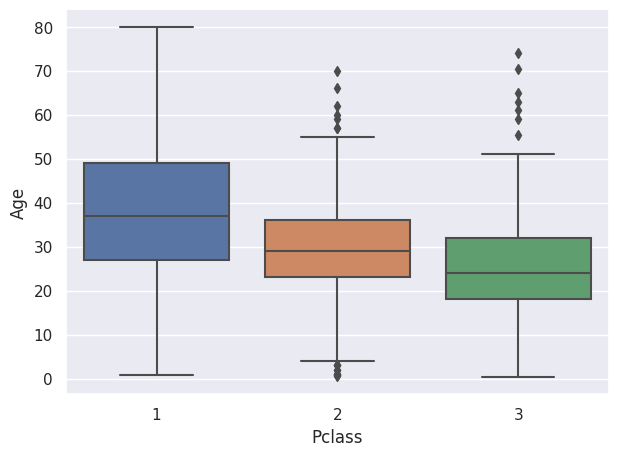

In [138]:
#boxplot of age by class
sns.boxplot(x='Pclass', y='Age', data=train_viz)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

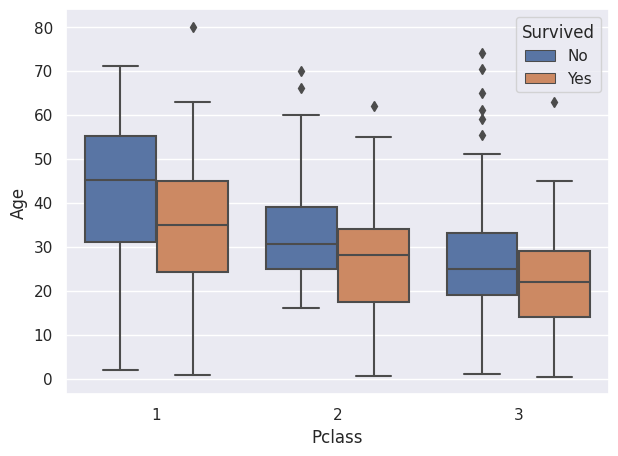

In [139]:
#boxplot survived by class
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_viz)

<AxesSubplot: xlabel='Sex', ylabel='Age'>

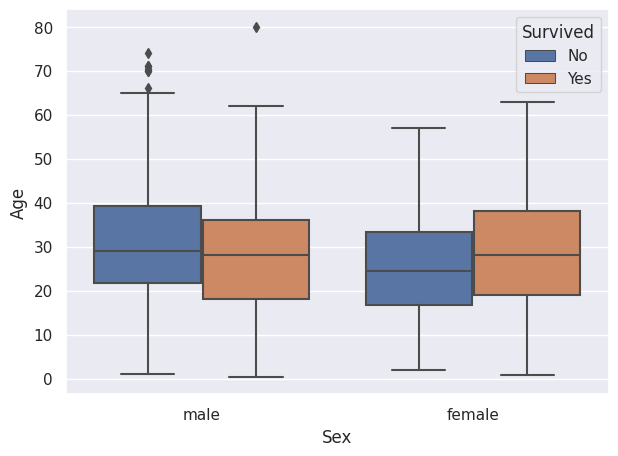

In [140]:
#boxplot of survival by gender
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train_viz)

Text(0.5, 1.0, 'First Class')

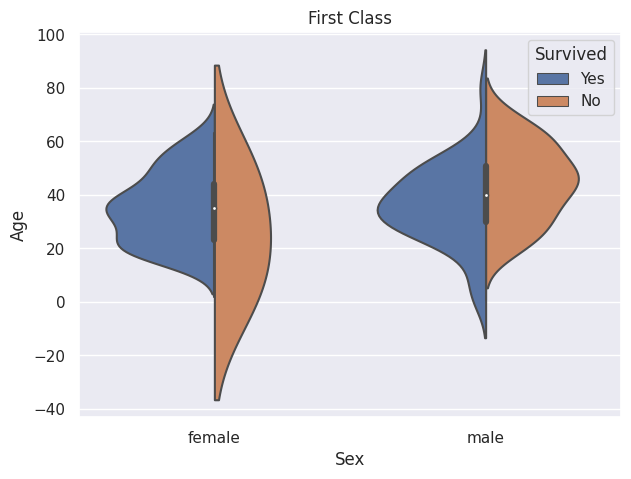

In [141]:
first_class_violin_plot = sns.violinplot(x='Sex', y='Age', data=first_class, hue='Survived', split=True)
plt.title('First Class')
# plt.savefig('first_class_violin_plot.png', dpi=300)

Text(0.5, 1.0, 'Second Class')

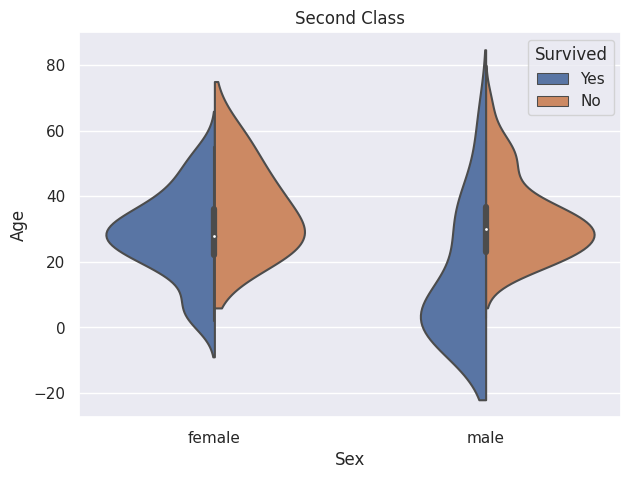

In [142]:
second_class_violin_plot = sns.violinplot(x='Sex', y='Age', data=second_class, hue='Survived', split=True)
plt.title('Second Class')
# plt.savefig('second_class_violin_plot.png', dpi=300)

Text(0.5, 1.0, 'Third Class')

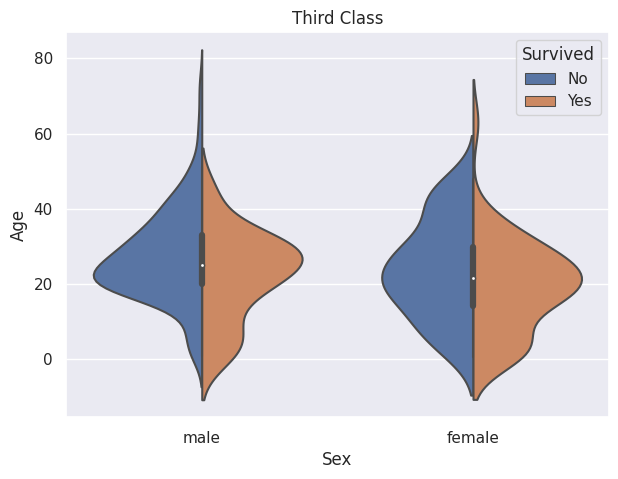

In [143]:
third_class_violin_plot = sns.violinplot(x='Sex', y='Age', data=third_class, hue='Survived', split=True)
plt.title('Third Class')
# plt.savefig('third_class_violin_plot.png', dpi=300)

Text(0.5, 1.0, 'Survived vs Not Survived')

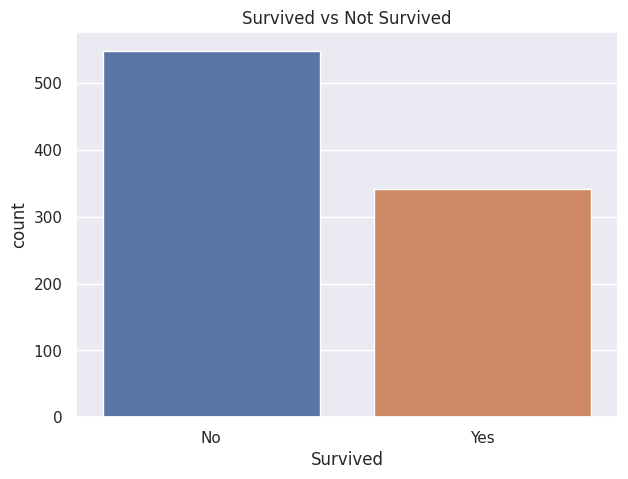

In [144]:
sns.countplot(x='Survived', data=train_viz)
plt.title('Survived vs Not Survived')
# plt.savefig('survived_not_survived.png', dpi=300)

Text(0.5, 1.0, 'Age Distribution')

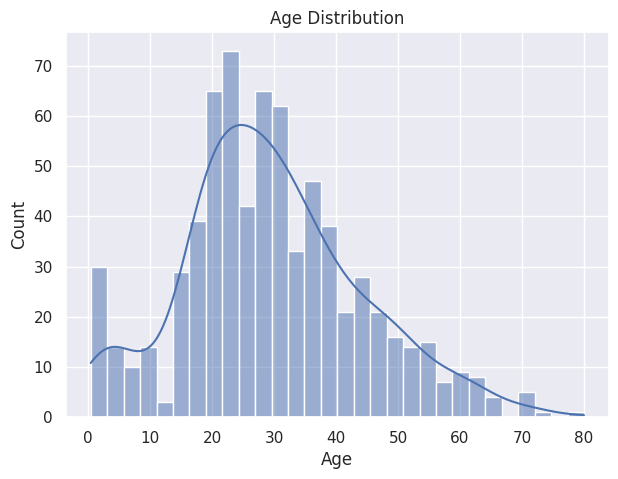

In [145]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
# plt.savefig('age_distribution.png', dpi=300)

In [146]:
males = train_viz[train_viz['Sex'] == 'male']
females = train_viz[train_viz['Sex'] == 'female']

Text(0.5, 1.0, 'Age Distribution of All Males')

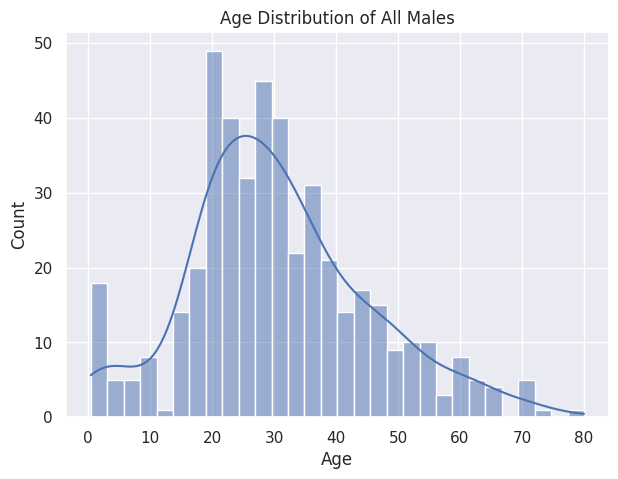

In [147]:
sns.histplot(males['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of All Males')
# plt.savefig('age_distribution_of_males.png', dpi=300)

Text(0.5, 1.0, 'Age Distribution of All Females')

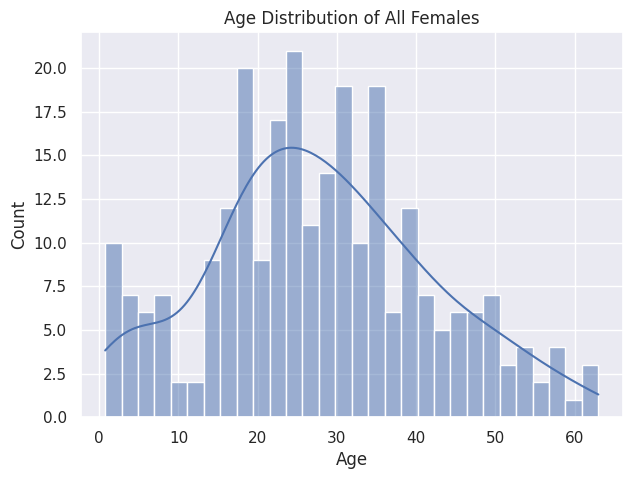

In [148]:
sns.histplot(females['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of All Females')
# plt.savefig('age_distribution_of_females.png', dpi=300)

In [149]:
#Create a dataframe to visualize a stacked histplot with kde
age_and_sex = train_viz.copy()
columns = ['Age', 'Sex']
age_and_sex = age_and_sex[columns]
age_and_sex['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

Text(0.5, 1.0, 'Age Distributions and Densities, Both Sexes')

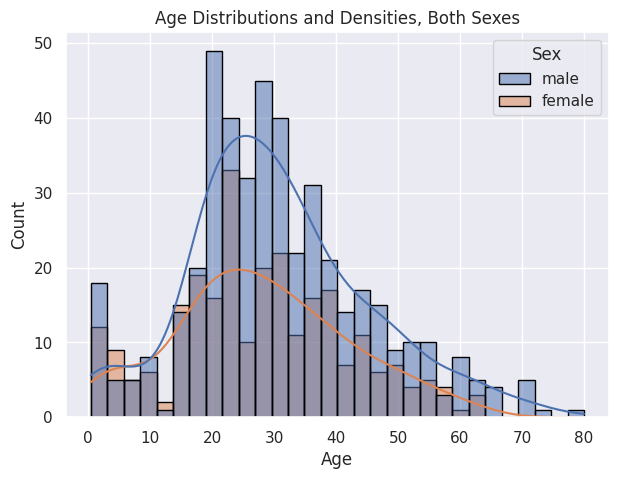

In [150]:
sns.histplot(age_and_sex, x='Age', hue='Sex', bins=30, kde=True, palette='deep', edgecolor='black')
plt.title('Age Distributions and Densities, Both Sexes')
# plt.savefig('age_distributions_all.png', dpi=300)

In [151]:
train_viz.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

_______________________________________________________________________________________________________________________________

## Statistical Analysis
#### Develop a correlation matrix

In [152]:
train.corr()

/tmp/ipykernel_1613/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [153]:
#Create fresh dataframe
corr_matrix = train.copy()

#Drop missing values from columns
corr_matrix.dropna(subset=['Age', 'Embarked', 'Fare'], inplace=True)

#Drop the cabin column
corr_matrix.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

#Check missing values counts
corr_matrix.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [154]:
#Copy the training dataset to create a new dataset
to_encode = corr_matrix['Embarked']
to_encode_2 = corr_matrix['Sex']

In [155]:
#Create OneHotEncoder to encode categorical variables of importance
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

#Reshape to_encode
to_encode = to_encode.values.reshape(-1, 1)
to_encode_2 = to_encode_2.values.reshape(-1, 1)

#Encode to_encode
encoded = encoder.fit_transform(to_encode)
encoded_2 = encoder.fit_transform(to_encode_2)

corr_matrix['Embarked'] = encoded
corr_matrix['Sex'] = encoded_2

corr_matrix.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0.0,22.0,1,0,7.2500,0.0
1,2,1,1,1.0,38.0,1,0,71.2833,1.0
2,3,1,3,1.0,26.0,0,0,7.9250,0.0
3,4,1,1,1.0,35.0,1,0,53.1000,0.0
4,5,0,3,0.0,35.0,0,0,8.0500,0.0


In [156]:
#Correlation matrix of preprocessed data
corr_matrix.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,-0.024674,0.024674,-0.082704,-0.011672,0.033681,0.009655
Survived,0.029526,1.000000,-0.356462,0.536762,-0.536762,-0.015523,0.095265,-0.082446,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.150826,0.150826,0.065187,0.023666,-0.365902,-0.552893
Sex,-0.024674,0.536762,-0.150826,1.000000,-1.000000,0.106296,0.249543,-0.099037,0.182457
Age,0.024674,-0.536762,0.150826,-1.000000,1.000000,-0.106296,-0.249543,0.099037,-0.182457
SibSp,-0.082704,-0.015523,0.065187,0.106296,-0.106296,1.000000,0.383338,-0.307351,0.139860
Parch,-0.011672,0.095265,0.023666,0.249543,-0.249543,0.383338,1.000000,-0.187896,0.206624
Fare,0.033681,-0.082446,-0.365902,-0.099037,0.099037,-0.307351,-0.187896,1.000000,0.093143
Embarked,0.009655,0.266100,-0.552893,0.182457,-0.182457,0.139860,0.206624,0.093143,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

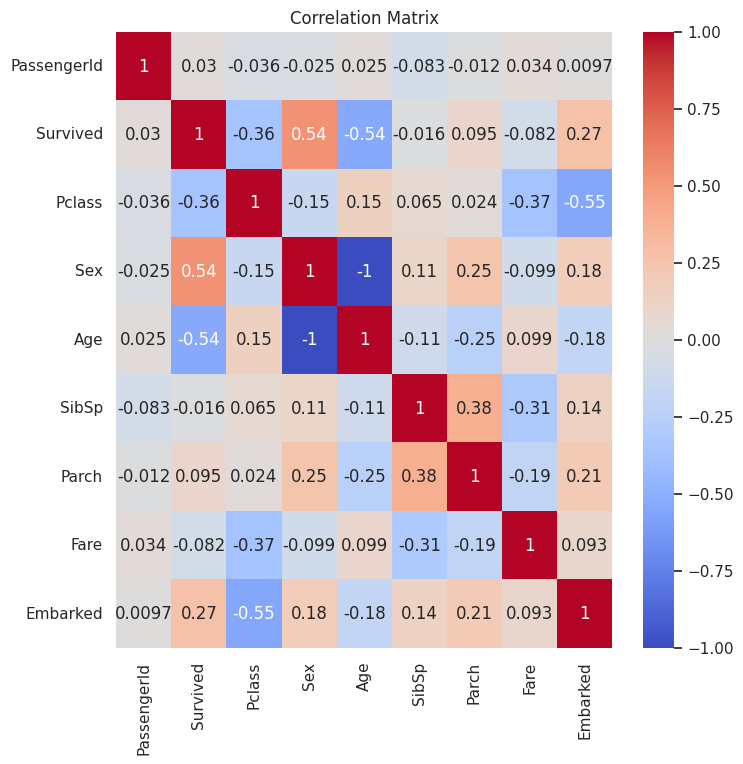

In [157]:
#Create a heatmap of the preprocessed correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# plt.savefig('correlation_matrix.png', dpi=300)

/tmp/ipykernel_1613/3617774556.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Matrix, non-preprocessed')

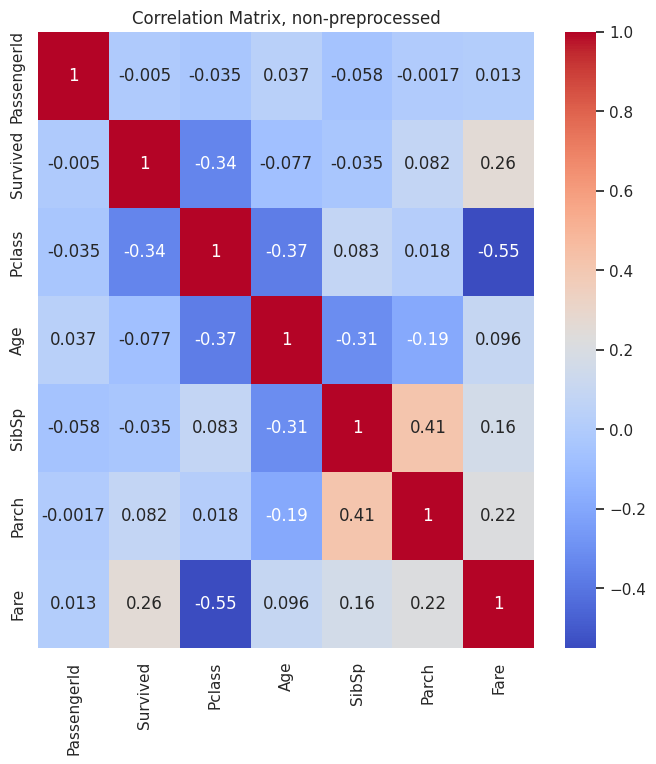

In [158]:
#Heatmap of unpresprocessed correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix, non-preprocessed')
# plt.savefig('correlation_matrix_non_preprocessed.png', dpi=300)


In [159]:
stats_frame = train.copy()
stats_frame.dropna(subset=['Age', 'Embarked', 'Fare'], inplace=True)

In [160]:
#Function to separate passengers by 'Sex' and 'Pclass'
def separate_passengers_by_gender_and_class(df, genders, pclasses):
    frames = []
    for gender in genders:
        for pclass in pclasses:
            frame = df[(df['Sex'] == gender) & (df['Pclass'] == pclass)]
            frames.append(frame)
    return frames

In [161]:
genders = train['Sex'].unique()
pclasses = train['Pclass'].unique()

genders.sort()
pclasses.sort()

print(genders)
print(pclasses)

['female' 'male']
[1 2 3]


In [162]:
first_class_women, second_class_women, third_class_women, first_class_men, second_class_men, third_class_men = separate_passengers_by_gender_and_class(train, genders, pclasses)

In [163]:
#List comprehension to calculate median age for each dataframe in list of dataframes
frames_list = [first_class_men, second_class_men, third_class_men, first_class_women, second_class_women, third_class_women]
median_ages = [df['Age'].median() for df in frames_list]
median_ages

[40.0, 30.0, 25.0, 35.0, 28.0, 21.5]

In [164]:
classes = ['1st Class Males', '2nd Class Males', '3rd Class Males', '1st Class Females', '2nd Class Females', '3rd Class Females']

In [165]:
#Create dictionary from median_ages and classes
median_ages_dict = dict(zip(classes, median_ages))
median_ages_dict

{'1st Class Males': 40.0,
 '2nd Class Males': 30.0,
 '3rd Class Males': 25.0,
 '1st Class Females': 35.0,
 '2nd Class Females': 28.0,
 '3rd Class Females': 21.5}